In [1]:
import os 
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import h5py
import numpy as np

### Resizing the image and ground truths

In [2]:
input_path = os.path.join(os.getcwd(), 'Images','Images')
groundtruth_path = os.path.join(os.getcwd(), 'GroundTruth','GroundTruth')
input_path,groundtruth_path

('C:\\Users\\farheen.syed_iprotec\\Desktop\\python\\Images\\Images',
 'C:\\Users\\farheen.syed_iprotec\\Desktop\\python\\GroundTruth\\GroundTruth')

In [3]:
input_images_path = glob.glob(os.path.join(input_path, '*.jpg'))
groundtruth_images_path = glob.glob(os.path.join(groundtruth_path, '*.h5'))
# input_images_path,groundtruth_images_path

In [ ]:
def resizing_inputs(images_path,desired_width,desired_height,resized_dir_image):
    
    if not os.path.exists(resized_dir_image):
        os.makedirs(resized_dir_image)
    
    for path in images_path:
        
        image = cv2.imread(path)
        
        resized_image = cv2.resize(image,(desired_width,desired_height))
        
        cvt_color = cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB)
        
        file_name = os.path.join(resized_dir_image,os.path.basename(path))
        
        cv2.imwrite(file_name,resized_image)

In [ ]:
images_path = input_images_path
desired_width = groundtruth_images_path
desired_width,desired_height = 224,224
resized_dir_image = 'C:\\Users\\farheen.syed_iprotec\\Desktop\\python\\Resized_224_input'

In [ ]:
resizing_inputs(images_path,desired_width,desired_height,resized_dir_image)

In [35]:
def resizing_outputs(ground_truth_paths, desired_width, desired_height, resized_dir_output):
    # Create the resized images directory if it doesn't exist
    if not os.path.exists(resized_dir_output):
        os.makedirs(resized_dir_output)
    
    for path in ground_truth_paths:
        # Check if the file exists
        if not os.path.isfile(path):
            print(f"Error: File '{path}' not found.")
            continue
        
        with h5py.File(path, 'r') as hf:
            
            ground_truth = np.array(hf['density'])
        # Resize the image
        resized_image = cv2.resize(ground_truth, (desired_width, desired_height))
        print(f' Resized Image shape - {resized_image.shape}')
#         # Convert BGR to RGB
#         resized_image_rgb = np.expand_dims(resized_image, axis=-1)
        
        # Save the resized image to the resized directory with the same filename
        file_name = os.path.join(resized_dir_output, os.path.basename(path))
        with h5py.File(file_name, 'w') as hf:
            hf.create_dataset('density', data=resized_image)

In [30]:
ground_truth_paths = groundtruth_images_path
desired_width,desired_height = 224,224
resized_dir_output = 'C:\\Users\\farheen.syed_iprotec\\Desktop\\python\\Resized_224_ground'

In [31]:
resizing_outputs(ground_truth_paths,desired_width,desired_height,resized_dir_output)

 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.27569318e-05 8.80311345e-05 1.37277661e-04 ... 2.08260062e-07
  1.75644800e-07 1.45807689e-07]
 [4.81968891e-05 8.05091913e-05 1.25663588e-04 ... 1.51699595e-07
  1.27942158e-07 1.06208397e-07]
 [4.25262988e-05 7.10771492e-05 1.10994959e-04 ... 1.09430545e-07
  9.22928081e-08 7.66148602e-08]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[3.40720842e-04 4.34862101e-04 5.03436371e-04 ... 4.32423898e-04
  3.58908088e-04 2.75537692e-04]
 [4.05862229e-04 5.17245324e-04 5.98121725e-04 ... 4.84363409e-04
  4.023209

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.2621556e-08
  1.5634885e-08 1.0691788e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9903753e-08
  1.3756478e-08 9.4072536e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7413161e-08
  1.2035104e-08 8.2301064e-09]]
 Resized Image shape - [[5.8568457e-07 3.3402530e-06 1.5077230e-05 ... 4.8435543e-04
  3.0781678e-04 1.7401605e-04]
 [7.0369833e-07 4.0133041e-06 1.8122137e-05 ... 6.2061968e-04
  3.9085752e-04 2.1989924e-04]
 [7.4748107e-07 4.2630040e-06 1.9277042e-05 ... 7.3444110e-04
  4.5876368e-04 2.5696636e-04]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+

 Resized Image shape - [[3.7687821e-06 3.7720242e-06 3.7734064e-06 ... 2.1557878e-03
  2.1276404e-03 1.8271112e-03]
 [3.7718705e-06 3.7751154e-06 3.7764987e-06 ... 2.2254705e-03
  2.2296361e-03 1.9492927e-03]
 [3.7739185e-06 3.7771651e-06 3.7785492e-06 ... 2.0984772e-03
  2.1397131e-03 1.9089981e-03]
 ...
 [5.1040789e-09 5.1084696e-09 5.1103415e-09 ... 2.2969999e-09
  1.9866979e-09 1.7157177e-09]
 [4.8027844e-09 4.8069158e-09 4.8086775e-09 ... 2.2058526e-09
  1.9078632e-09 1.6476360e-09]
 [4.5178665e-09 4.5217536e-09 4.5234101e-09 ... 2.1166306e-09
  1.8306946e-09 1.5809928e-09]]
 Resized Image shape - [[1.3453016e-08 1.3584399e-08 1.3692762e-08 ... 1.6442686e-05
  1.4994346e-05 1.3652011e-05]
 [1.5123431e-08 1.5271130e-08 1.5392946e-08 ... 1.6879878e-05
  1.5428453e-05 1.4081787e-05]
 [1.6982222e-08 1.7148071e-08 1.7284862e-08 ... 1.7302258e-05
  1.5852616e-05 1.4505983e-05]
 ...
 [7.0982374e-08 7.2503276e-08 7.3961786e-08 ... 3.2320047e-10
  3.0227848e-10 2.8176389e-10]
 [6.3592914e-

 Resized Image shape - [[4.2987136e-05 4.5727276e-05 4.8096164e-05 ... 2.7296787e-06
  1.2397863e-06 5.2237664e-07]
 [4.6398705e-05 4.9356306e-05 5.1913194e-05 ... 3.7121413e-06
  1.6860085e-06 7.1038977e-07]
 [4.9763374e-05 5.2935447e-05 5.5677752e-05 ... 4.8467141e-06
  2.2013176e-06 9.2751219e-07]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.4898039e-07
  7.8134786e-07 7.1751811e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.0042759e-07
  7.3595402e-07 6.7521665e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.5597166e-07
  6.9440739e-07 6.3651464e-07]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 3.6747911e-09 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 8.7470537e-09 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.4240392e-08
  4.7500169e-08 4.0576264e-08]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.8111135e-08
  6.8242507e-08 5.9469823e-08]
 [0.0000000e+

 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.4924943e-04
  4.7241925e-04 1.7080024e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7599817e-03
  9.0758310e-04 3.4425763e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6959046e-03
  1.4534770e-03 5.8239861e-04]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.2238296e-07
  7.2831961e-07 6.4352611e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.0997245e-07
  7.1690027e-07 6.3304458e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.9763987e-07
  7.0560475e-07 6.2272267e-07]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0803150e-03
  2.6613835e-03 1.4288956e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6301089e-03
  3.1374760e-03 1.6861932e-03]
 [0.0000000e+00 0.0000000

 Resized Image shape - [[4.8433691e-03 5.5827582e-03 3.6565934e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [6.8561034e-03 7.6805940e-03 4.9145301e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.1631693e-03 7.7344975e-03 4.8097102e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.2174215e-09
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.3937746e-09
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.6092350e-09
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.76248267e-04
  4.74279106e-04 4.00291814e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.13606558e-03
  1.43274572e-03 1.20982027e-03]
 [1.60734689e-10 1.46366119e-09 8.36039948e-09 ... 2.55854777e-03
  3.22782504e-03 2.72655510e-03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.63950042e-09
  1.88767876e-10 1.381

 Resized Image shape - [[0.00023537 0.00031356 0.00039332 ... 0.         0.         0.        ]
 [0.00025256 0.00033987 0.00043071 ... 0.         0.         0.        ]
 [0.00026617 0.00036302 0.00046618 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.23126924e-07
  2.75220362e-08 4.17690016e-09]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.30116535e-07
  7.37895434e-08 1.11987193e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.83644680e-07
  1.75164757e-07 2.65839954e-08]
 ...
 [9.66565312e-06 1.04670744e-

 Resized Image shape - [[2.3693911e-04 3.0505095e-04 3.2272132e-04 ... 2.3933812e-06
  1.7946714e-06 1.3310317e-06]
 [4.2841339e-04 5.4988486e-04 5.7546917e-04 ... 2.4173846e-06
  1.8141704e-06 1.3468530e-06]
 [6.8215351e-04 8.7379501e-04 9.0785848e-04 ... 2.4288279e-06
  1.8246350e-06 1.3563214e-06]
 ...
 [3.0043797e-08 3.7242373e-08 4.5977419e-08 ... 2.0620433e-07
  2.0114818e-07 1.9572734e-07]
 [2.8275851e-08 3.5050821e-08 4.3271847e-08 ... 1.8163769e-07
  1.7719796e-07 1.7243437e-07]
 [2.6553748e-08 3.2916095e-08 4.0636429e-08 ... 1.5970586e-07
  1.5581462e-07 1.5163634e-07]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4914463e-03
  1.4518659e-03 1.0323667e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0910837e-03
  2.0297701e-03 1.4352141e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5861484e-03
  2.4897775e-03 1.7317401e-03]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.2496323e-09
  4.1419308e-09 3.2507848e-09]
 [0.0000000e+

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.4471173e-04
  1.0890579e-03 1.1026689e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1176325e-03
  1.2271479e-03 1.2117599e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3026258e-03
  1.3272155e-03 1.2562998e-03]
 ...
 [8.5934822e-05 1.7799031e-04 3.2608211e-04 ... 3.3034138e-07
  3.7277072e-08 0.0000000e+00]
 [7.2437535e-05 1.5044010e-04 2.7664599e-04 ... 2.3122615e-07
  2.6092502e-08 0.0000000e+00]
 [5.7710611e-05 1.2024092e-04 2.2209600e-04 ... 1.5341647e-07
  1.7312141e-08 0.0000000e+00]]
 Resized Image shape - [[7.9806894e-05 2.8738921e-04 6.7839830e-04 ... 3.7277761e-04
  3.6712576e-04 3.0044708e-04]
 [1.6537233e-04 5.9565989e-04 1.4065217e-03 ... 6.8491563e-04
  6.7437888e-04 5.5187842e-04]
 [2.2631188e-04 8.1735553e-04 1.9349100e-03 ... 1.0456573e-03
  1.0284930e-03 8.4154500e-04]
 ...
 [3.1469237e-05 4.7493435e-05 6.8764595e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.9722847e-

 Resized Image shape - [[1.47392393e-05 2.88841620e-05 5.27123775e-05 ... 1.93539854e-05
  1.06459256e-05 5.43210581e-06]
 [2.00020913e-05 3.82342005e-05 6.85041960e-05 ... 2.99892272e-05
  1.66438203e-05 8.53156871e-06]
 [2.66820116e-05 4.94118540e-05 8.63782916e-05 ... 4.42267155e-05
  2.47103817e-05 1.27235026e-05]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29016509e-04
  1.23011647e-04 1.07395106e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.35522587e-05
  7.97329703e-05 6.96471179e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.14400999e-05
  4.91131286e-05 4.29133288e-05]]
 Resized Image shape - [[3.3761502e-05 3.4640903e-05 3.3582561e-05 ... 1.4347888e-05
  7.8743142e-06 4.0679774e-06]
 [4.9103506e-05 5.0453527e-05 4.9001355e-05 ... 1.6271271e-05
  8.9359028e-06 4.6200653e-06]
 [6.9563946e-05 7.1630187e-05 6.9771719e-05 ... 1.8034538e-05
  9.9157132e-06 5.1346001e-06]
 ...
 [1.3317867e-09 1.6371635e-09 1.9973077e-09 ... 5.1009344e-08
  4.4909

 Resized Image shape - [[6.83101689e-07 1.69899158e-06 3.79003109e-06 ... 4.43235680e-04
  1.56625698e-04 3.86068095e-05]
 [1.15362673e-06 2.86926866e-06 6.40062990e-06 ... 7.22671277e-04
  2.56190426e-04 6.38840502e-05]
 [1.85562351e-06 4.61525542e-06 1.02954955e-05 ... 1.01283588e-03
  3.61512910e-04 9.23870102e-05]
 ...
 [3.74267780e-04 5.00211318e-04 6.30007300e-04 ... 3.93775508e-07
  3.76877040e-07 3.36944169e-07]
 [3.06102127e-04 4.22606390e-04 5.48858137e-04 ... 2.07238855e-07
  1.98345418e-07 1.77329269e-07]
 [2.47359509e-04 3.52161296e-04 4.70047060e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.3820072e-06
  6.2210466e-07 2.9781623e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3494968e-05
  1.5598793e-06 7.46

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0139760e-06
  5.3560011e-06 4.4407270e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0145439e-05
  9.0354506e-06 7.4914046e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.6563239e-05
  1.4751094e-05 1.2230315e-05]
 ...
 [4.3236410e-05 5.7718971e-05 7.4853087e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.1914311e-05 5.5954017e-05 7.2564195e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.0108709e-05 5.3543601e-05 6.9438232e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0769007e-06
  5.3892159e-06 4.7586846e-06]
 [0.0000000e+

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.2228605e-05
  3.5458583e-05 1.1769741e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3827068e-04
  5.3271349e-05 1.7705366e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7998245e-04
  6.9760099e-05 2.3272130e-05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[8.31142734e-06 1.51435061e-05 3.30352705e-05 ... 3.75196658e-04
  2.87153467e-04 2.04838725e-04]
 [2.13763433e-05 3.39174549e-05 5.61206034e-05 ... 5.14617248e-04
  3.97527649e-04 2.84813490e-04]
 [5.08577759e-05 7.51535918e-05 1.01756166e-04 ... 6.65690692e-04
  5.19711582e-04 3.74189782e-04]
 ...
 [1.66837435e-05 1.92213902e-05 2.19102621e-05 ... 4.03781560e-05
  3.74822594e-05 3.443

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.8990738e-09
  5.5947758e-09 4.5151509e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.3006368e-09
  4.2985300e-09 3.4690419e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.0439598e-09
  3.2794325e-09 2.6466001e-09]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000

 Resized Image shape - [[3.50982264e-05 8.32388032e-05 1.71460604e-04 ... 4.84751108e-05
  3.00223364e-05 1.76378671e-05]
 [4.43670069e-05 1.05645406e-04 2.18718007e-04 ... 5.09061356e-05
  3.15279503e-05 1.85224035e-05]
 [5.38012537e-05 1.28663625e-04 2.67804251e-04 ... 5.26613148e-05
  3.26149966e-05 1.91610325e-05]
 ...
 [6.81942636e-09 1.39881386e-08 2.70794747e-08 ... 2.64957926e-04
  2.25296448e-04 1.85063574e-04]
 [4.35189529e-09 8.92669139e-09 1.72810779e-08 ... 2.46318552e-04
  2.08152414e-04 1.69830979e-04]
 [2.73845147e-09 5.61716407e-09 1.08742029e-08 ... 2.27397206e-04
  1.91077503e-04 1.54929905e-04]]
 Resized Image shape - [[3.4126983e-04 7.0409535e-04 1.1631924e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.0558146e-04 8.3618978e-04 1.3810050e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.3734154e-04 9.0031046e-04 1.4859538e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.8284169e-06 3.4874272e-06 4.0798059e-06 ... 8.6351603e-05
  8.3671

 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.02900297e-08 1.27048807e-07 1.76424521e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.60403438e-08 1.06997796e-07 1.48580966e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.36199502e-08 8.95208387e-08 1.24311839e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.22625943e-04
  6.07242437e-05 4.28830344e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.14166702e-03
  2.14883126e-04 1.51748945e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.59419205e-03
  4.88275487e-04 3.44816726e-05]
 ...
 [1.72325963e-04 1.74771165e-04 1.71855252e-04 ... 8

 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.30560875e-04 1.34130940e-04 1.35895694e-04 ... 6.34237153e-07
  6.13749023e-07 5.81651705e-07]
 [1.17880554e-04 1.21119396e-04 1.22727157e-04 ... 1.34748115e-08
  7.19103532e-09 3.48636431e-09]
 [1.05140374e-04 1.08042368e-04 1.09488639e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shap

 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.03479499e-04
  1.01233934e-04 9.83258142e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.04099534e-04
  1.01840516e-04 9.89149703e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.04454666e-04
  1.02187943e-04 9.92524147e-05]
 ...
 [1.62758297e-04 1.64476209e-04 1.63477482e-04 ... 5.57750788e-08
  3.79846625e-08 2.49486689e-08]
 [1.47405401e-04 1.48703606e-04 1.47466591e-04 ... 3.62775410e-08
  2.47061998e-08 1.62272524e-08]
 [1.32662855e-04 1.33636422e-04 1.32271773e-04 ... 1.24673551e-08
  8.49067927e-09 5.57675461e-09]]
 Resized Image shape - [[5.4034794e-04 5.7754450e-04 6.0743804e-04 ... 2.1626793e-04
  1.9890496e-04 1.8295059e-04]
 [6.1766460e-04 6.6021387e-04 6.9440791e-04 ... 2.6765704e-04
  2.4729842e-04 2.2842077e-04]
 [6.8790274e-04 7.3535659e-04 7.7348872e-04 ... 3.2472610e-04
  3.0144287e-04 2.7962765e-04]
 ...
 [7.8726907e-07 8.3692720e-07 8.8746367e-07 ... 0.0000000e+00
  0.0000

 Resized Image shape - [[1.7779035e-03 1.5624459e-03 7.9496839e-04 ... 1.0161780e-08
  2.6043441e-09 0.0000000e+00]
 [2.9875676e-03 2.6255925e-03 1.3413009e-03 ... 2.3893479e-08
  6.1236158e-09 0.0000000e+00]
 [3.9211768e-03 3.4469785e-03 1.8084327e-03 ... 5.2541022e-08
  1.3465644e-08 0.0000000e+00]
 ...
 [1.5960786e-07 2.7574026e-07 4.6035890e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2048339e-07 2.0814838e-07 3.4751164e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.9614012e-08 1.5481812e-07 2.5847478e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9488596e-05
  1.6420321e-05 1.1965889e-05]
 [0.0000000e+

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.3985365e-05 3.9889041e-05 4.5724144e-05 ... 9.5780515e-06
  9.1579795e-06 8.5455849e-06]
 [2.8578159e-05 3.3542536e-05 3.8449252e-05 ... 7.1574864e-06
  6.8435756e-06 6.3859447e-06]
 [2.3709465e-05 2.7828091e-05 3.1898879e-05 ... 5.2719665e-06
  5.0407498e-06 4.7036742e-06]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.0543710e-06 3.3136762e-06 5.6115186e-06 ... 1.2341914e-04
  1.1571824e-04 1.0484366e-04]
 [1.6526599e-

 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[5.0192821e-04 6.7101984e-04 8.3990296e-04 ... 1.0624094e-04
  5.5095439e-05 2.5761934e-05]
 [5.5449060e-04 7.4128970e-04 9.2785829e-04 ... 1.3676948e-04
  7.0927214e-05 3.3164673e-05]
 [5.9862185e-04 8.0028805e-04 1.0017055e-03 ... 1.7044006e-04
  8.8388428e-05 4.1329320e-05]
 ...
 [2.9906636e-04 4.7342779e-04 6.9502986e-04 ... 7.4392848e-04
  6.2072277e-04 4.8807025e-04]
 [2.6853223e-04 4.2455253e-04 6.2195607e-04 ... 6.5036985e-04
  5.4265891e-04 4.2668910e-04]
 [2.3484467e-04 3.7094776e-04 5.4258184e-04 ... 5.5712531e-04
  4.6485700e-04 3.6551402e-04]]
 Resized Image shape - [[1.1362064e-05 1.5656773e-05 2.3834566e-05 ... 3.4476552e-04
  2.7105812e-04 1.7378239e-04]
 [1.7657290e-05 2.4050245e-05 3.5836703e-05 ... 5.0287507e-04
  3.9538438e-04 2.5349334e-04]
 [2.6817666e-05 3.6029494

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2700156e-07
  9.0921397e-08 6.2794186e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.9125906e-07
  1.3692384e-07 9.4565436e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.8438410e-07
  2.0359276e-07 1.4060983e-07]
 ...
 [3.5693969e-07 4.7469507e-07 6.2642511e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.3838268e-07 4.5001610e-07 5.9385786e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.1994344e-07 4.2549371e-07 5.6149713e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.8883834e-09 1.4345991e-08 2.2737312e-08 ... 6.2846797e-05
  5.6353838e-05 5.0073326e-05]
 [5.7125442e-

 Resized Image shape - [[1.25926058e-03 1.86211476e-03 2.03503692e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.64942506e-03 3.91491828e-03 4.24294733e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.80917143e-03 7.10202102e-03 7.65452115e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.28360582e-04 1.29384120e-04 1.29562482e-04 ... 1.20388904e-04
  1.06045401e-04 9.19258528e-05]
 [1.18199379e-04 1.19141892e-04 1.19306125e-04 ... 1.02496408e-04
  9.02846659e-05 7.82635980e-05]
 [1.08532215e-04 1.09397646e-04 1.09548440e-04 ... 8.66292248e-05
  7.63079515e-05 6.61478407e-05]]
 Resized Image shape - [[7.85895008e-06 1.96070068e-05 4.40661606e-05 ... 6.43910200e-04
  6.21150248e-04 5.79530548e-04]
 [1.15800631e-05 2.88906776e-05 6.49309295e-05 ... 7.01132347e-04
  6.76327792e-04 6.30973198e-04]
 [1.63143304e-05 4.07020307e-05 9.14765915e-05 ... 7.54445617e-04
  7.27718405e-04 6.78854412e-04]
 ...
 [7.06624705e-04 7.59387622e-04 7.79162452e-04 ... 3

 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00056192 0.00071446 0.00081369 ... 0.         0.         0.        ]
 [0.00052536 0.00066798 0.00076075 ... 0.         0.         0.        ]
 [0.00046247 0.00058801 0.00066968 ... 0.         0.         0.        ]]
 Resized Image shape - [[6.49762573e-04 8.91292293e-04 1.14802271e-03 ... 1.03966244e-07
  4.96030275e-08 2.19645280e-08]
 [7.51021202e-04 1.02970295e-03 1.32557855e-03 ... 1.90941151e-07
  9.10993663e-08 4.03393656e-08]
 [8.47812742e-04 1.16167311e-03 1.49445166e-03 ... 3.36840372e-07
  1.60708908e-07 7.11629085e-08]
 ...
 [7.77403056e-06 9.72924772e-

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.7941430e-08
  3.3857422e-08 2.3721922e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.4166793e-08
  3.1191675e-08 2.1854193e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.0518323e-08
  2.8615037e-08 2.0048892e-08]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.8211758e-05 4.9115319e-05 6.1061241e-05 ... 4.6244062e-05
  3.6461155e-05 2.7639086e-05]
 [3.2788968e-

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.5021619e-06 5.5213868e-06 8.4622652e-06 ... 4.3332577e-05
  4.2882893e-05 4.2123265e-05]
 [3.3330850e-06 5.2548257e-06 8.0537247e-06 ... 4.1467840e-05
  4.1037511e-05 4.0310573e-05]
 [3.1339541e-06 4.9408827e-06 7.5725657e-06 ... 3.9552233e-05
  3.9141782e-05 3.8448426e-05]]
 Resized Image shape - [[2.1689448e-09 4.3451376e-09 8.2362082e-09 ... 1.0859838e-05
  4.2488082e-06 1.5016217e-06]
 [3.6721548e-09 7.3565802e-09 1.3944398e-08 ... 1.3723188e-05
  5.3762474e-06 1.9032642e-06]
 [6.1342540e-09 1.2289006e-08 2.3293810e-08 ... 1.6777145e-05
  6.5835056e-06 2.3354407e-06]
 ...
 [1.2661768e-08 2.6624978e-08 5.3459797e-08 ... 5.0118324e-06
  4.2264201e-06 3.5387450e-06]
 [8.6176755e-

 Resized Image shape - [[9.2376204e-04 1.1585199e-03 1.3225055e-03 ... 5.6425110e-04
  2.1783914e-04 7.0817761e-05]
 [1.1001101e-03 1.3857078e-03 1.5887510e-03 ... 1.2828320e-03
  5.4261606e-04 1.8317108e-04]
 [1.2172664e-03 1.5371803e-03 1.7668647e-03 ... 2.3199571e-03
  1.0599989e-03 3.7673902e-04]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.2434787e-08
  2.7710227e-08 2.3759938e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1898004e-08
  2.7267514e-08 2.3380338e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.1338566e-08
  2.6803418e-08 2.2982398e-08]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [4.4291451e-07 4.4274017e-07 4.4183179e-07 ... 2.3397215e-06
  2.2446841e-06 2.1492331e-06]
 [4.0893195e-

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.2410531e-05 5.5981516e-05 5.9205075e-05 ... 7.8204839e-06
  6.7056635e-06 5.6812191e-06]
 [4.8813225e-05 5.2139101e-05 5.5141409e-05 ... 6.7208516e-06
  5.7627849e-06 4.8823872e-06]
 [4.5257028e-05 4.8340607e-05 5.1124185e-05 ... 5.7432712e-06
  4.9245600e-06 4.1722201e-06]]
 Resized Image shape - [[7.76338493e-05 1.01245678e-04 1.25235543e-04 ... 1.54550234e-03
  2.00530770e-03 2.08588806e-03]
 [9.56903459e-05 1.24793936e-04 1.54363486e-04 ... 1.74764893e-03
  2.28738482e-03 2.37003993e-03]
 [1.14481074e-04 1.49299740e-04 1.84675882e-04 ... 1.81170448e-03
  2.37477035e-03 2.41616671e-03]
 ...
 [3.12950101e-06 3.64030120e-06 4.21198456e-06 ... 1.99824566e-08
  1.73035666e-08 1.495

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [4.7233343e-06 4.7230988e-06 4.7091789e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.3948635e-06 4.3946443e-06 4.3816922e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.0823911e-06 4.0821874e-06 4.0701561e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [7.9785714e-08 1.3780082e-07 2.3457386e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.7349887e-

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.0017412e-08 8.7411031e-08 1.4757825e-07 ... 1.9794777e-09
  0.0000000e+00 0.0000000e+00]
 [3.5952528e-08 6.2831063e-08 1.0607927e-07 ... 1.2350839e-09
  0.0000000e+00 0.0000000e+00]
 [2.5465031e-08 4.4502990e-08 7.5135517e-08 ... 7.5275325e-10
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.16741803e-05
  8.25191728e-06 5.71458258e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.28924885e-05
  9.14556222e-06 6.36354389e-06]
 [0.00000000e

 Resized Image shape - [[1.7311833e-06 2.9296327e-06 4.6493665e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.7384613e-06 4.6342207e-06 7.3545716e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.1745566e-06 7.0644851e-06 1.1211434e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[4.07240623e-05 6.37946068e-05 9.47509252e-05 ... 3.12922202e-05
  2.51769998e-05 1.99169372e-05]
 [4.40431249e-05 6.89939479e-05 1.02473256e-04 ... 3.25256624e-05
  2.61693986e-05 2.07019984e-05]
 [4.62533353e-05 7.24562706e-05 1.07615677e-04 ... 3.34932774e-05
  2.69479224e-05 2.13178701e-05]
 ...
 [2.45862952e-06 2.45709521e-06 2.45221077e-06 ... 8.47404237e-07
  8.32162300e-07 8.159

 Resized Image shape - [[1.36167015e-08 3.18656674e-08 7.05191852e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.04321751e-08 4.78151740e-08 1.05815673e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.97354603e-08 6.95866333e-08 1.53996226e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.14656201e-08
  6.03409305e-08 5.90242841e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.24903108e-08
  5.15298453e-08 5.04054576e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.47249668e-08
  4.39065921e-08 4.29485425e-08]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.9279004e-04
  3.3608495e-04 2.6661804e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.5111429e-04
  3.8589747e-04 3.0609462e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.9688551e-04
  4.2481729e-04 3.3686392e-04]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.7859965e-07
  3.2230

 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.04289320e-05 1.43769839e-05 1.94007825e-05 ... 8.46224357e-05
  8.14793311e-05 7.67887468e-05]
 [9.99014173e-06 1.37720826e-05 1.85845074e-05 ... 7.61574556e-05
  7.33648121e-05 6.91672103e-05]
 [9.50431240e-06 1.31023335e-05 1.76807262e-05 ... 6.80578451e-05
  6.55880431e-05 6.18538979e-05]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5275949e-04
  2.5664788e-04 2.4714333e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0041815e-04
  3.0492351e-04 2.93

 Resized Image shape - [[2.4265673e-06 2.7074909e-06 3.0116209e-06 ... 4.0433748e-05
  3.9467403e-05 3.8407663e-05]
 [2.5762490e-06 2.8721863e-06 3.1923951e-06 ... 4.2713014e-05
  4.1651201e-05 4.0495146e-05]
 [2.7320957e-06 3.0433118e-06 3.3798526e-06 ... 4.4982658e-05
  4.3820914e-05 4.2564621e-05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.9825819e-09
  9.9624771e-09 9.9243662e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.6803276e-09
  8.6630454e-09 8.6300727e-09]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.5368618e-09
  7.5220372e-09 7.4935587e-09]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [4.1445978e-06 4.3387972e-06 4.5331990e-06 ... 1.4686567e-06
  1.4250504e-06 1.3724566e-06]
 [3.7777811e-

 Resized Image shape - [[1.9618483e-04 2.9866083e-04 4.1157292e-04 ... 1.3188827e-06
  9.3661919e-07 6.5486967e-07]
 [2.2830635e-04 3.4721618e-04 4.7803140e-04 ... 1.4664755e-06
  1.0414338e-06 7.2815448e-07]
 [2.5136265e-04 3.8178454e-04 5.2506820e-04 ... 1.6168543e-06
  1.1482271e-06 8.0282257e-07]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.1208547e-08
  6.8930120e-08 5.8320591e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.5713722e-08
  6.4266089e-08 5.4374429e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.0466299e-08
  5.9812059e-08 5.0605955e-08]]
 Resized Image shape - [[1.75574098e-06 3.79911603e-06 8.62171328e-06 ... 7.85320164e-09
  0.00000000e+00 0.00000000e+00]
 [2.17015076e-06 4.37430845e-06 9.56348140e-06 ... 9.93654403e-09
  0.00000000e+00 0.00000000e+00]
 [2.67752171e-06 4.94175993e-06 1.02514723e-05 ... 1.23920545e-08
  0.00000000e+00 0.00000000e+00]
 ...
 [5.16193177e-06 5.18683601e-06 5.20817275e-06 ... 0.00000000e+00
  0.00000000e+00 0.000

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.5178360e-07
  2.5131877e-07 1.7759103e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.6808433e-07
  2.6328914e-07 1.8630250e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.8007596e-07
  2.7197714e-07 1.9253592e-07]
 ...
 [3.9587616e-07 4.7914551e-07 5.7710611e-07 ... 6.1326150e-06
  6.1316014e-06 6.1183141e-06]
 [3.7452165e-07 4.5329932e-07 5.4597569e-07 ... 5.8559926e-06
  5.8550245e-06 5.8423366e-06]
 [3.5337843e-07 4.2770878e-07 5.1515320e-07 ... 5.5854598e-06
  5.5845367e-06 5.5724349e-06]]
 Resized Image shape - [[2.0198991e-04 5.0366699e-04 1.1113731e-03 ... 3.4979297e-04
  2.7841184e-04 2.4829630e-04]
 [3.7593892e-04 8.0272538e-04 1.4656055e-03 ... 5.5326917e-04
  4.7957737e-04 4.4743461e-04]
 [6.2215084e-04 1.2048288e-03 1.8722275e-03 ... 7.8879850e-04
  7.4274809e-04 7.2023552e-04]
 ...
 [1.6380685e-08 1.6916658e-08 1.7330910e-08 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.3513252e-

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.3401844e-07
  1.7635193e-07 1.3174756e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0773676e-07
  1.5658631e-07 1.1701235e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8364724e-07
  1.3846264e-07 1.0349596e-07]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[1.1594967e-05 1.9137517e-05 2.8082477e-05 ... 2.1781948e-04
  1.7146912e-04 9.8850171e-05]
 [2.1347149e-05 3.5208417e-05 5.1614668e-05 ... 5.0352729e-04
  3.9668364e-04 2.2868399e-04]
 [3.6666948e-05 6.0438168

 Resized Image shape - [[1.6992970e-04 1.7260636e-04 1.7212014e-04 ... 1.1652282e-08
  2.9330915e-09 5.5036914e-10]
 [1.7387449e-04 1.7732734e-04 1.7768619e-04 ... 1.7915154e-07
  4.5095710e-08 8.4618188e-09]
 [1.7710699e-04 1.8154790e-04 1.8301723e-04 ... 9.6423003e-07
  4.3186736e-07 2.6322479e-07]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.6533528e-06
  1.4607102e-06 1.2857632e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5427170e-06
  1.3627194e-06 1.1993275e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4383221e-06
  1.2702710e-06 1.1177913e-06]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.3520798e-05 1.4324344e-05 1.5128016e-05 ... 3.7553428e-07
  3.5487795e-07 3.3345836e-07]
 [1.3418885e-

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.9959352e-07
  5.3019380e-07 3.4226682e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.2603470e-07
  4.1511052e-07 2.6797477e-07]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.8447419e-07
  3.2124473e-07 2.0737967e-07]]
 Resized Image shape - [[6.2039144e-05 9.9742865e-05 1.2213162e-04 ... 1.6218235e-05
  1.6404229e-05 1.5272337e-05]
 [1.4634125e-04 2.3527880e-04 2.8806258e-04 ... 2.8453853e-05
  2.8780167e-05 2.6794334e-05]
 [2.9500859e-04 4.7425475e-04 5.8058731e-04 ... 4.7538746e-05
  4.8083930e-05 4.4766137e-05]
 ...
 [4.7559976e-07 5.2683737e-07 5.8261764e-07 ... 5.5533064e-06
  5.4082293e-06 5.2602795e-06]
 [4.7564217e-

 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[3.8791124e-05 3.8783019e-05 3.8559505e-05 ... 3.4320561e-07
  3.2254761e-07 3.0041139e-07]
 [4.0271403e-05 4.0264582e-05 4.0034931e-05 ... 4.3016144e-07
  4.0426946e-07 3.7652472e-07]
 [4.1661613e-05 4.1655971e-05 4.1420488e-05 ... 5.3619311e-07
  5.0391895e-07 4.6933533e-07]
 ...
 [2.2766044e-06 2.3173648e-06 2.3543164e-06 ... 1.3514130e-09
  1.0997745e-09 8.9115010e-10]
 [2.1381877e-06 2.1764702e-06 2.2111751e-06 ... 1.1608354e-09
  9.4468333e-10 7.6547929e-10]
 [2.0059479e-06 2.0418624e-06 2.0744210e-06 ... 9.9464559e-10
  8.0943863e-10 6.5589018e-10]]
 Resized Image shape - [[2.88489900e-05 4.61689233e-05 6.91822570e-05 ... 7.76247980e-05
  7.01970857e-05 6.22941297e-05]
 [3.87725959e-05 6.19298880e-05 9.26139692e-05 ... 8.47921910e-05
  7.66883968e-05 6.80640223e-05]
 [5.00733804e

 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.9953789e-08 3.7778708e-08 4.7315400e-08 ... 9.0980520e-06
  8.5959600e-06 8.1025428e-06]
 [2.5490531e-08 3.2149501e-08 4.0265181e-08 ... 9.0457288e-06
  8.5464744e-06 8.0558657e-06]
 [2.1605462e-08 2.7249522e-08 3.4128277e-08 ... 8.9829482e-06
  8.4871190e-06 7.9998917e-06]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000

 Resized Image shape - [[5.8139568e-07 8.1499053e-07 1.0887691e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.1051228e-06 1.5491423e-06 2.0649368e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0166417e-06 2.8268942e-06 3.7598957e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.2860892e-06
  8.7361013e-06 8.1968265e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.0837220e-06
  8.5462252e-06 8.0192012e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.8765182e-06
  8.3517161e-06 7.8371440e-06]]
 Resized Image shape - [[3.6569929e-04 6.2297104e-04 8.9122535e-04 ... 2.2451051e-03
  3.3321907e-03 2.9065195e-03]
 [4.2287228e-04 7.2036561e-04 1.0305608e-03 ... 2.9762900e-03
  4.5573353e-03 3.9853575e-03]
 [4.4356525e-04 7.5561617e-04 1.0810003e-03 ... 2.9056706e-03
  4.4447440e-03 3.8586627e-03]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4360607e-09
  1.0022155e-09 5.5375177e-10]
 [0.0000000e+

 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[8.19903798e-05 5.10857208e-04 1.66274467e-03 ... 7.01915326e-07
  5.61535103e-07 4.42186689e-07]
 [1.26395331e-04 7.86662917e-04 2.56142719e-03 ... 9.00226780e-07
  7.20185028e-07 5.67117240e-07]
 [1.36517046e-04 8.47097370e-04 2.75724777e-03 ... 1.14394516e-06
  9.15160740e-07 7.20652906e-07]
 ...
 [1.05442126e-07 1.15964490e-07 1.27143082e-07 ... 2.95314362e-06
  2.80582503e-06 2.66206962e-06]
 [9.38611819e-08 1.03227855e-07 1.13178679e-07 ... 2.87893022e-06
  2.73531396e-06 2.59517083e-06]
 [8.33990015e-08 9.17216312e-08 1.00563291e-07 ... 2.80435279e-06
  2.66445704e-06 2.52794416e-06]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.7822570e-08
  2.3190772e-08 1.3905881e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.8861171e-08
  2.9959050e-08 1.79

 Resized Image shape - [[2.8977866e-04 3.3339018e-03 1.9807002e-02 ... 3.2466769e-06
  2.2875674e-06 1.5665638e-06]
 [1.0001683e-03 3.2851028e-03 1.4400344e-02 ... 4.1793219e-06
  2.9446971e-06 2.0165771e-06]
 [2.5481195e-03 3.3905434e-03 4.1950354e-03 ... 5.2939645e-06
  3.7300599e-06 2.5544066e-06]
 ...
 [1.0942841e-08 1.2303132e-08 1.3762845e-08 ... 4.4514336e-06
  4.3909977e-06 4.3192667e-06]
 [8.9964232e-09 1.0114756e-08 1.1314828e-08 ... 4.0745931e-06
  4.0206037e-06 3.9561960e-06]
 [7.3729471e-09 8.2894678e-09 9.2729788e-09 ... 3.7234283e-06
  3.6752881e-06 3.6175570e-06]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 1.1185085e-09 ... 1.0562032e-07
  1.0471649e-07 1.0212608e-07]
 [0.0000000e+00 0.0000000e+00 3.4228422e-09 ... 1.5119592e-07
  1.4990208e-07 1.4619390e-07]
 [0.0000000e+00 0.0000000e+00 9.3472945e-09 ... 2.1421073e-07
  2.1237766e-07 2.0712399e-07]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+

 Resized Image shape - [[5.4380905e-07 7.4792723e-07 1.0111562e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [6.3338877e-07 8.7113062e-07 1.1777203e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.3361770e-07 1.0089803e-06 1.3640855e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.6046680e-05 4.1321033e-05 4.7320413e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.2797929e-05 3.7991507e-05 4.3963628e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.9825369e-05 3.4913730e-05 4.0820167e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2718185e-04
  1.2936539e-04 1.2978833e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3525697e-04
  1.3748668e-04 1.3783152e-04]
 [0.0000000e+00 0.0000000

 Resized Image shape - [[1.36818981e-03 2.28671310e-03 2.74593080e-03 ... 4.96877939e-04
  2.27977085e-04 5.22454102e-05]
 [1.89170917e-03 3.15641193e-03 3.78407934e-03 ... 3.18995328e-03
  1.46344677e-03 3.35377466e-04]
 [1.74341514e-03 2.82291160e-03 3.28299636e-03 ... 7.01469602e-03
  3.21907457e-03 7.37686816e-04]
 ...
 [8.50427114e-06 1.98092021e-05 4.34305839e-05 ... 6.14416194e-07
  2.07598148e-07 5.75504053e-08]
 [3.72903196e-06 9.56066833e-06 2.26083812e-05 ... 3.59024241e-08
  1.21306636e-08 3.36286532e-09]
 [1.59265824e-06 4.32159368e-06 1.06270945e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
 Resized Image shape - [[9.29549627e-04 1.23535097e-03 1.56539388e-03 ... 2.98057275e-04
  2.42101349e-04 1.85692945e-04]
 [9.02081665e-04 1.18802639e-03 1.48889422e-03 ... 3.43021791e-04
  2.78231484e-04 2.13059378e-04]
 [8.14767962e-04 1.05875707e-03 1.30487350e-03 ... 3.86144151e-04
  3.12676479e-04 2.38967274e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.6239723e-04
  1.6297576e-04 1.5924724e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7511839e-04
  1.7573041e-04 1.7170336e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8602921e-04
  1.8666140e-04 1.8237354e-04]
 ...
 [3.9853759e-08 4.0024236e-08 3.9997019e-08 ... 2.8594243e-09
  2.2139550e-09 1.3568796e-09]
 [3.2727510e-08 3.2867501e-08 3.2845151e-08 ... 2.5987068e-09
  2.0120903e-09 1.2331617e-09]
 [2.6791337e-08 2.6905939e-08 2.6887642e-08 ... 2.3559066e-09
  1.8240983e-09 1.1179460e-09]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.8920418e-06
  9.9874205e-06 9.9175086e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2253844e-05
  1.2371993e-05 1.2285389e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.5032909e-05
  1.5177853e-05 1.5071608e-05]
 ...
 [5.2522091e-07 5.7773127e-07 6.3631774e-07 ... 1.0079557e-05
  9.6209133e-06 9.1656266e-06]
 [4.6910239e-

 Resized Image shape - [[5.6434862e-07 5.6404667e-07 5.4644306e-07 ... 5.1082261e-05
  4.8149526e-05 4.4980203e-05]
 [8.8787698e-07 8.8740194e-07 8.5970657e-07 ... 5.3117637e-05
  5.0075072e-05 4.6785710e-05]
 [1.3703213e-06 1.3695882e-06 1.3268441e-06 ... 5.4992986e-05
  5.1851595e-05 4.8453745e-05]
 ...
 [1.3767709e-10 1.7116211e-10 2.1178764e-10 ... 2.7046697e-06
  2.5770819e-06 2.4511396e-06]
 [1.1383938e-10 1.4152673e-10 1.7511828e-10 ... 2.5814779e-06
  2.4597425e-06 2.3395703e-06]
 [9.3861224e-11 1.1668960e-10 1.4438602e-10 ... 2.4613628e-06
  2.3453301e-06 2.2307802e-06]]
 Resized Image shape - [[1.10646542e-05 1.13975284e-05 1.05966374e-05 ... 5.14996464e-06
  4.40037047e-06 3.19214382e-06]
 [1.91544405e-05 1.97264835e-05 1.82854928e-05 ... 1.00352690e-05
  8.57460327e-06 6.22024163e-06]
 [3.22338310e-05 3.31879928e-05 3.06530928e-05 ... 1.89360635e-05
  1.61798580e-05 1.17372929e-05]
 ...
 [0.00000000e+00 1.09772984e-07 3.61650848e-07 ... 2.68698088e-04
  2.79972504e-04 2.770

 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[8.0079171e-06 9.0855192e-06 9.1732372e-06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.3196986e-05 1.4972866e-05 1.5117424e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.1238504e-05 2.4096507e-05 2.4329152e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.7865417e-05 1.0304367e-04 1.1803428e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.4772284e-05 9.9416218e-05 1.1387911e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.1298967e-05 9.5342912e-05 1.0921322e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
 Resized Image shape - [[2.7732543e-09 4.9202390e-07 1.7453619e-06 ... 2.8205503e-05
  1.2657282e-05 5.1317320e-06]
 [5.8163185e-09 5.0631877e-07 1.7927586e-06 ... 3.3739540e-05
  1.5141329e-05 6.1391888e-06]
 [1.1372876e-08 5.0133684

 Resized Image shape - [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.85107783e-04
  1.06684281e-04 5.72443314e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.80905030e-04
  1.04217725e-04 5.59003820e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.68984989e-04
  9.73361748e-05 5.22025512e-05]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.62342037e-10
  2.17840870e-10 1.80260987e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.24865779e-10
  1.86721735e-10 1.54510224e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.92345515e-10
  1.59717878e-10 1.32164835e-10]]
 Resized Image shape - [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 Resized Image shape - [[7.18369774e-05 8.65070178e-05 1.01975740e-04 ... 2.19761932e-05
  2.09503723e-05 1.98531889e-05]
 [7.64272554e-05 9.20399107e-05 1.08465756e-04 ... 2.33399151e-05
  2.225043

 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.8645268e-04
  2.9518618e-04 2.7043917e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.1717314e-04
  4.3195512e-04 3.9634763e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.6607014e-04
  5.8805832e-04 5.4014666e-04]
 ...
 [6.9405987e-06 7.4298900e-06 7.9281208e-06 ... 9.1858437e-06
  7.7563973e-06 6.4934852e-06]
 [6.6447533e-06 7.1131890e-06 7.5901826e-06 ... 8.4906960e-06
  7.1735826e-06 6.0091629e-06]
 [6.3500256e-06 6.7976835e-06 7.2535195e-06 ... 7.8216945e-06
  6.6117505e-06 5.5414580e-06]]
 Resized Image shape - [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7097272e-05
  2.7135280e-05 2.7066979e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7647304e-05
  2.7686081e-05 2.7616396e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.8146509e-05
  2.8185987e-05 2.8115044e-05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+

 Resized Image shape - [[1.0185946e-03 4.4356720e-03 9.9351630e-03 ... 6.2665596e-05
  2.8957589e-05 1.1368884e-05]
 [4.2376313e-03 8.1309937e-03 1.4024011e-02 ... 1.0340814e-04
  4.7991623e-05 1.9001742e-05]
 [9.1672968e-03 9.3894238e-03 9.1702137e-03 ... 1.5581242e-04
  7.2842100e-05 2.9248647e-05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4799740e-06
  2.3734217e-06 2.2688682e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.4227736e-06
  2.3186792e-06 2.2165370e-06]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.3653879e-06
  2.2637589e-06 2.1640360e-06]]
 Resized Image shape - [[8.66159899e-05 8.92612152e-05 9.08422808e-05 ... 1.38716234e-04
  1.29474385e-04 1.18431868e-04]
 [8.86182534e-05 9.13246258e-05 9.29422313e-05 ... 1.41585100e-04
  1.32136833e-04 1.20855875e-04]
 [9.00327359e-05 9.27823057e-05 9.44257336e-05 ... 1.42886667e-04
  1.33333888e-04 1.21937621e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.38250786e-09
  5.57563373e-09 4.863

In [32]:
with h5py.File('C:\\Users\\farheen.syed_iprotec\\Desktop\\python\\Resized_224_ground\\IMG_1.h5','r') as file:
    ground = np.array(file['density'])

In [33]:
ground.shape

(224, 224)

In [ ]:
a = cv2.resize(ground,(224,224))

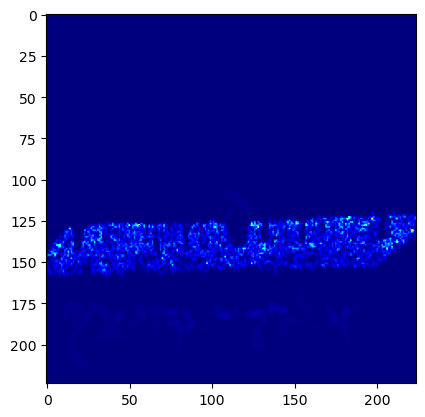

In [34]:
plt.imshow(ground,cmap='jet')

In [ ]:
a = plt.imread('C:\\Users\\farheen.syed_iprotec\\Desktop\\python\\Resized_224_i\\IMG_1.jpg')
plt.imshow(a)